<a href="https://colab.research.google.com/github/ChaitanReddy/Innomatics_Research_Hackathon/blob/main/Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🍽️ Food Delivery Data Analysis – Hackathon Submission

## Personal Statement & Objective

This notebook represents my solution to the food delivery data problem provided in the hackathon.
I have worked through the entire lifecycle of the data — starting from raw files in different formats and ending with
meaningful analytical insights that could support real business decisions.




## 🔍 My Approach to the Problem

I approached this problem by first understanding the nature of each dataset and the system it represents.
Since the data was provided in multiple formats (CSV, JSON, and SQL), my first priority was to load and validate each file independently.

Only after confirming the structure and integrity of the data did I proceed to combine the datasets.
I intentionally used **left joins** during the merge process to ensure that no order-level information was lost.
The resulting merged dataset is treated as the **single source of truth** for all further analysis.


## 1️⃣ Libraries and Tools Used

In [1]:

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")



## 2️⃣ Raw Data Ingestion

The hackathon provides data extracted from three different systems:
- **orders.csv** captures transactional order-level data
- **users.json** contains user profile and membership information
- **restaurants.sql** stores restaurant attributes such as cuisine and ratings

Each file is loaded separately to reflect a real-world data engineering workflow.


### 📂 Loading Transactional Order Data

In [2]:

orders = pd.read_csv("orders.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


### 📂 Loading User Master Data

In [3]:

users = pd.read_json("users.json")
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


### 📂 Loading Restaurant Master Data from SQL

In [4]:

conn = sqlite3.connect(":memory:")
with open("restaurants.sql", "r", encoding="utf-8") as f:
    sql_script = f.read()
conn.executescript(sql_script)

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8



## 3️⃣ Initial Data Validation

Before combining the datasets, I reviewed column names, data types, and record counts
to ensure that the join keys were consistent and suitable for merging.


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [7]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB



## 4️⃣ Dataset Integration Strategy

### Join Design
- Orders were linked to users using **user_id**
- Orders were linked to restaurants using **restaurant_id**
- A **left join strategy** was chosen to preserve all order records

This approach mirrors real-world analytics pipelines where transactional data must never be dropped.


In [8]:

final_df = (
    orders
    .merge(users, on="user_id", how="left")
    .merge(restaurants, on="restaurant_id", how="left")
)

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0



## 5️⃣ Creation of the Final Analytical Dataset

After successful integration, the combined dataset is saved as:

📁 **final_food_delivery_dataset.csv**

From this point onward, all analysis is performed exclusively on this file.


In [9]:

final_df.to_csv("final_food_delivery_dataset.csv", index=False)



## 6️⃣ Exploratory Overview of the Final Dataset

This section provides a high-level overview of the merged data,
including structure, summary statistics, and data completeness.


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [11]:
final_df.describe()

,order_id,user_id,restaurant_id,total_amount,rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,801.162412,4.045430
std,2886.89568,861.727776,144.622558,405.458753,0.606531
min,1.00000,1.000000,1.000000,100.200000,3.000000
25%,2500.75000,761.000000,127.000000,446.310000,3.500000
50%,5000.50000,1508.000000,251.000000,806.295000,4.100000
75%,7500.25000,2250.250000,376.000000,1149.227500,4.600000
max,10000.00000,3000.000000,500.000000,1499.830000,5.000000



## 7️⃣ Order Volume Trends Over Time

To understand demand patterns, I analyzed how the number of orders changes over time.
This helps identify seasonality, peak periods, and demand fluctuations.


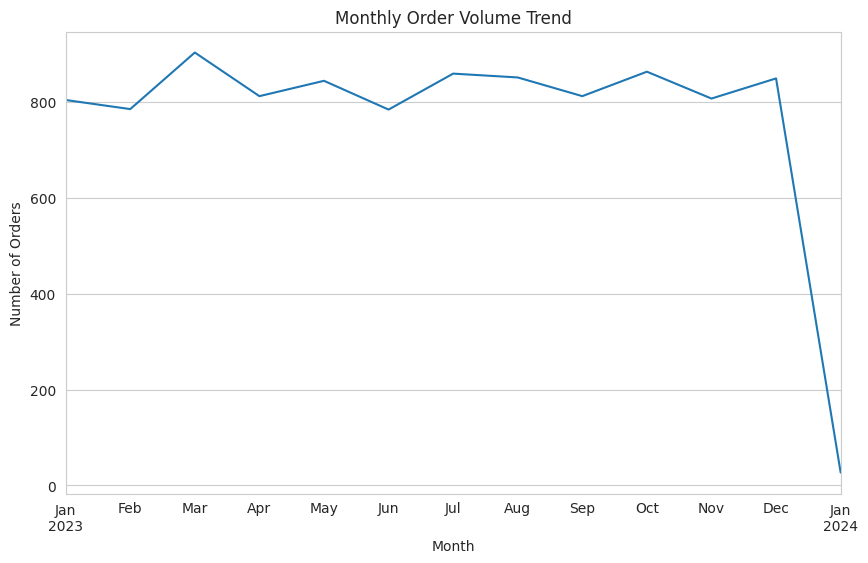

In [12]:

final_df['order_date'] = pd.to_datetime(final_df['order_date'], dayfirst=True)

orders_by_month = final_df.groupby(final_df['order_date'].dt.to_period('M'))['order_id'].count()
orders_by_month.plot(title="Monthly Order Volume Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()



## 8️⃣ Revenue Distribution and Seasonality

Revenue trends were examined at a monthly level to understand
how customer spending varies across different time periods.


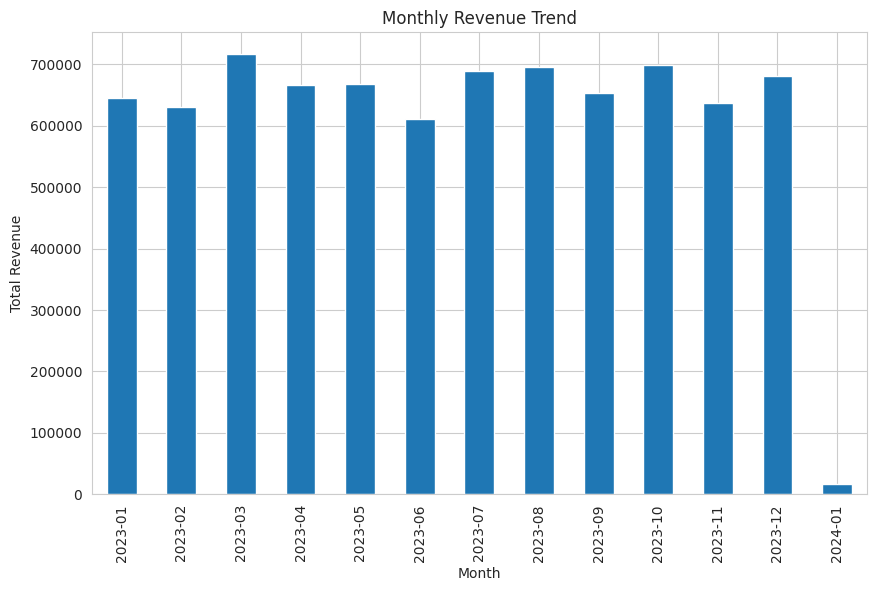

In [13]:

revenue_by_month = final_df.groupby(final_df['order_date'].dt.to_period('M'))['total_amount'].sum()
revenue_by_month.plot(kind="bar", title="Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()



## 9️⃣ Impact of Membership Type

This analysis compares **Gold** and **Regular** users to evaluate
whether membership status influences customer spending behavior.


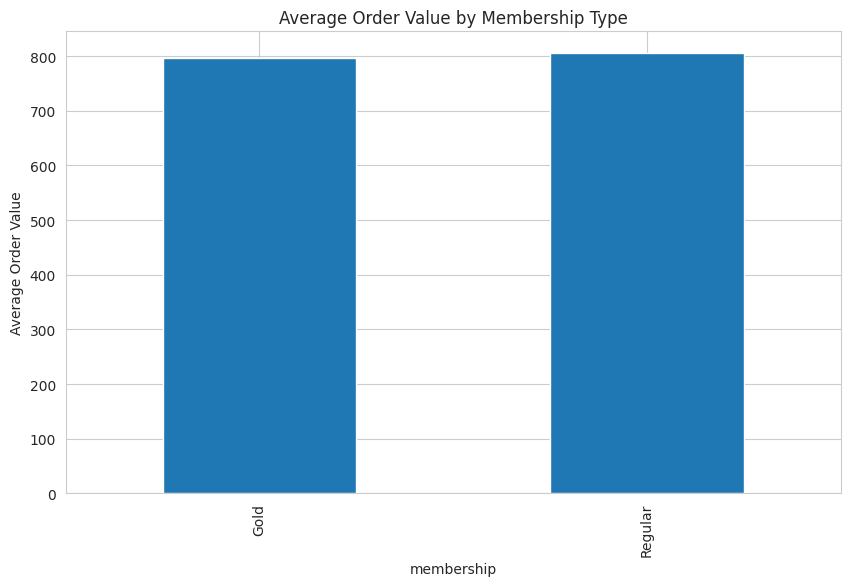

In [14]:

final_df.groupby("membership")['total_amount'].mean().plot(
    kind="bar",
    title="Average Order Value by Membership Type"
)
plt.ylabel("Average Order Value")
plt.show()



## 🔟 Geographic and Cuisine-Level Performance

City-wise and cuisine-wise analysis helps identify strong markets
and popular food categories that drive overall platform revenue.


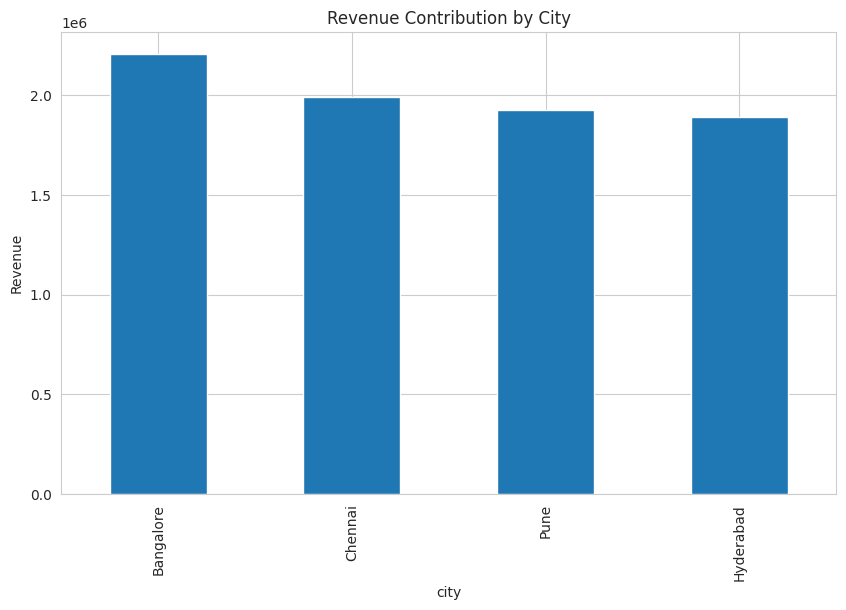

In [15]:

final_df.groupby("city")['total_amount'].sum().sort_values(ascending=False).plot(
    kind="bar",
    title="Revenue Contribution by City"
)
plt.ylabel("Revenue")
plt.show()


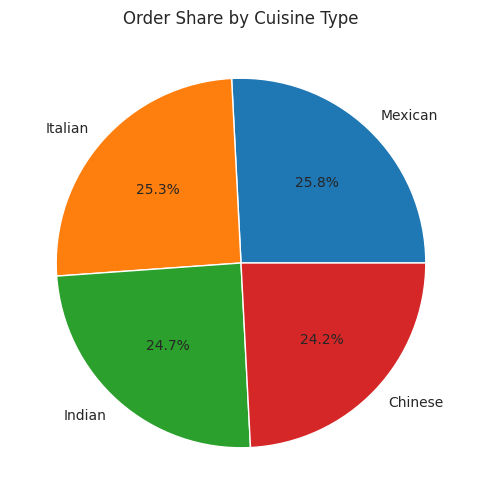

In [16]:

final_df['cuisine'].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Order Share by Cuisine Type"
)
plt.ylabel("")
plt.show()



## ✅ Final Observations

- Integrating data from multiple formats provided a holistic view of platform activity.
- Premium (Gold) users generally contribute higher value per transaction.
- Revenue generation is concentrated in specific cities and cuisines.
- Temporal trends indicate clear periods of increased demand.

Overall, this analysis demonstrates a complete workflow combining data engineering
and exploratory analytics techniques commonly used in real-world business scenarios.



---
# 🗄️ SQL Setup (Google Colab)

The following cell loads the final merged dataset into an in-memory SQLite database.
All SQL queries below can be executed directly in Google Colab.


In [17]:

import pandas as pd
import sqlite3

df = pd.read_csv("final_food_delivery_dataset.csv")
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

conn = sqlite3.connect(":memory:")
df.to_sql("final_food_delivery_dataset", conn, index=False, if_exists="replace")
conn



---
# 📌 Multiple Choice Questions


### Which city has the highest total revenue (total_amount) from Gold members?

Options:
- Hyderabad
- Bangalore
- Chennai
- Pune

In [18]:
pd.read_sql("""
SELECT city
FROM final_food_delivery_dataset
WHERE membership='Gold'
GROUP BY city
ORDER BY SUM(total_amount) DESC
LIMIT 1;
""", conn)

,city
0,Chennai


### Which cuisine has the highest average order value across all orders?

Options:
- Indian
- Chinese
- Italian
- Mexican

In [19]:
pd.read_sql("""
SELECT cuisine
FROM final_food_delivery_dataset
GROUP BY cuisine
ORDER BY AVG(total_amount) DESC
LIMIT 1;
""", conn)

,cuisine
0,Mexican


### How many distinct users placed orders worth more than ₹1000 in total?

Options:
- < 500
- 500 – 1000
- 1000 – 2000
- > 2000

In [20]:
pd.read_sql("""
SELECT COUNT(*) AS user_count
FROM (
  SELECT user_id
  FROM final_food_delivery_dataset
  GROUP BY user_id
  HAVING SUM(total_amount) > 1000
) t;
""", conn)

,user_count
0,2544


### Which restaurant rating range generated the highest total revenue?

Options:
- 3.0 – 3.5
- 3.6 – 4.0
- 4.1 – 4.5
- 4.6 – 5.0

In [21]:
pd.read_sql("""
SELECT rating_bucket
FROM (
  SELECT
    CASE
      WHEN rating BETWEEN 3.0 AND 3.5 THEN '3.0 – 3.5'
      WHEN rating BETWEEN 3.6 AND 4.0 THEN '3.6 – 4.0'
      WHEN rating BETWEEN 4.1 AND 4.5 THEN '4.1 – 4.5'
      ELSE '4.6 – 5.0'
    END AS rating_bucket,
    total_amount
  FROM final_food_delivery_dataset
) t
GROUP BY rating_bucket
ORDER BY SUM(total_amount) DESC
LIMIT 1;
""", conn)

,rating_bucket
0,4.6 – 5.0


### Among Gold members, which city has the highest average order value?

Options:
- Hyderabad
- Bangalore
- Chennai
- Pune

In [22]:
pd.read_sql("""
SELECT city
FROM final_food_delivery_dataset
WHERE membership='Gold'
GROUP BY city
ORDER BY AVG(total_amount) DESC
LIMIT 1;
""", conn)

,city
0,Chennai


### Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?

Options:
- Indian
- Chinese
- Italian
- Mexican

In [23]:
pd.read_sql("""
SELECT cuisine
FROM final_food_delivery_dataset
GROUP BY cuisine
ORDER BY COUNT(DISTINCT restaurant_id), SUM(total_amount) DESC
LIMIT 1;
""", conn)

,cuisine
0,Chinese


### What percentage of total orders were placed by Gold members?

Options:
- 40%
- 45%
- 50%
- 55%

In [24]:
pd.read_sql("""
SELECT ROUND(
  100.0 * SUM(CASE WHEN membership='Gold' THEN 1 ELSE 0 END) / COUNT(*)
) AS gold_percentage
FROM final_food_delivery_dataset;
""", conn)

,gold_percentage
0,50.0


### Which restaurant has the highest average order value but less than 20 total orders?

Options:
- Grand Cafe Punjabi
- Grand Restaurant South Indian
- Ruchi Mess Multicuisine
- Ruchi Foods Chinese

In [25]:
pd.read_sql("""
SELECT restaurant_name_x
FROM final_food_delivery_dataset
GROUP BY restaurant_name_x, restaurant_name_y
HAVING COUNT(*) < 20
ORDER BY AVG(total_amount) DESC
LIMIT 1;
""", conn)

,restaurant_name_x
0,Hotel Dhaba Multicuisine


### Which combination contributes the highest revenue?

Options:
- Gold + Indian cuisine
- Gold + Italian cuisine
- Regular + Indian cuisine
- Regular + Chinese cuisine

In [26]:
pd.read_sql("""
SELECT membership || ' + ' || cuisine AS combo
FROM final_food_delivery_dataset
WHERE (membership='Gold' AND cuisine IN ('Indian','Italian'))
   OR (membership='Regular' AND cuisine IN ('Indian','Chinese'))
GROUP BY membership, cuisine
ORDER BY SUM(total_amount) DESC
LIMIT 1;
""", conn)

,combo
0,Gold + Italian


### During which quarter of the year is the total revenue highest?

Options:
- Q1 (Jan–Mar)
- Q2 (Apr–Jun)
- Q3 (Jul–Sep)
- Q4 (Oct–Dec)

In [27]:
pd.read_sql("""
SELECT
  'Q' || ((CAST(STRFTIME('%m', order_date) AS INTEGER)-1)/3 + 1)
FROM final_food_delivery_dataset
GROUP BY ((CAST(STRFTIME('%m', order_date) AS INTEGER)-1)/3 + 1)
ORDER BY SUM(total_amount) DESC
LIMIT 1;
""", conn)

,"'Q' || ((CAST(STRFTIME('%m', order_date) AS INTEGER)-1)/3 + 1)"
0,Q3



---
# 🔢 Numerical Questions



### How many total orders were placed by users with Gold membership?

In [28]:
pd.read_sql("""SELECT COUNT(*) FROM final_food_delivery_dataset WHERE membership='Gold';""", conn)

,COUNT(*)
0,4987


### What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?

In [29]:
pd.read_sql("""SELECT ROUND(SUM(total_amount)) FROM final_food_delivery_dataset WHERE city='Hyderabad';""", conn)

,ROUND(SUM(total_amount))
0,1889367.0


### How many distinct users placed at least one order?

In [30]:
pd.read_sql("""SELECT COUNT(DISTINCT user_id) FROM final_food_delivery_dataset;""", conn)

,COUNT(DISTINCT user_id)
0,2883


### What is the average order value (rounded to 2 decimals) for Gold members?

In [31]:
pd.read_sql("""SELECT ROUND(AVG(total_amount),2) FROM final_food_delivery_dataset WHERE membership='Gold';""", conn)

,"ROUND(AVG(total_amount),2)"
0,797.15


### How many orders were placed for restaurants with rating ≥ 4.5?

In [32]:
pd.read_sql("""SELECT COUNT(*) FROM final_food_delivery_dataset WHERE rating >= 4.5;""", conn)

,COUNT(*)
0,3374


### How many orders were placed in the top revenue city among Gold members only?

In [33]:
pd.read_sql("""
SELECT COUNT(*)
FROM final_food_delivery_dataset
WHERE membership='Gold'
AND city = (
  SELECT city
  FROM final_food_delivery_dataset
  WHERE membership='Gold'
  GROUP BY city
  ORDER BY SUM(total_amount) DESC
  LIMIT 1
);
""", conn)

,COUNT(*)
0,1337
